In [24]:
import numpy as np
import matplotlib.pyplot as plt

X: [[-4.52676238 -5.07282891]
 [ 4.16078248  4.69078762]
 [-6.91877122 -5.02651388]
 [ 4.52082576  4.81434102]
 [-5.97468167 -4.2129154 ]
 [ 5.82254491  3.77915635]
 [-4.74244961 -5.07444592]
 [-5.68002472 -4.7677463 ]
 [ 6.46564877  4.7742237 ]
 [ 4.09197592  3.5876963 ]
 [ 4.76584663  4.76586304]
 [-4.7233092  -4.17281675]
 [ 4.29794691  4.67233785]
 [-5.88385744 -4.84627489]
 [-5.24538812 -5.75373616]
 [-4.03662387 -4.58721907]
 [ 4.323078    5.61167629]
 [-4.18648278 -6.23086432]
 [-5.88951443 -5.81581028]
 [-5.16128571 -4.59594914]
 [ 4.78032811  5.35711257]
 [-5.91942423 -3.45006559]
 [-4.94179128 -6.1429703 ]
 [-5.99053633 -5.56629773]
 [-4.17793984 -3.10320702]
 [ 5.49671415  4.8617357 ]
 [ 5.09707755  5.96864499]
 [ 5.0675282   3.57525181]
 [-5.44651495 -4.14360121]
 [ 3.52147801  4.28015579]
 [-6.06230371 -4.52640757]
 [ 5.73846658  5.17136828]
 [ 4.92798988  6.0035329 ]
 [-4.37433265 -5.85715756]
 [ 6.03099952  5.93128012]
 [ 2.3802549   5.8219025 ]
 [-4.82681907 -4.61468262

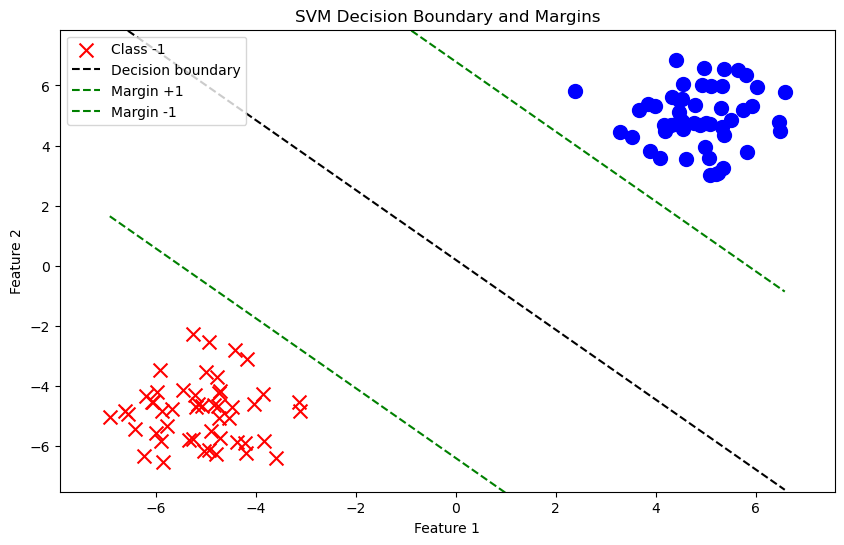

In [33]:


class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]
    
    def predict(self, x):
        approx = np.dot(x, self.w) - self.b
        return np.sign(approx)

    def plot_hyperplanes(self, X, y):
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]
        
        plt.figure(figsize=(10, 6))
        
        # Plotting the data points
        for idx, label in enumerate(y):
            if label == 1:
                plt.scatter(X[idx][0], X[idx][1], color='b', marker='o', s=100, label="Class 1" if idx == 0 else "")
            else:
                plt.scatter(X[idx][0], X[idx][1], color='r', marker='x', s=100, label="Class -1" if idx == 0 else "")
        
        # Plot the decision boundary and margins
        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])
        
        # Decision boundary
        x1_1 = get_hyperplane_value(x0_1, self.w, self.b, 0)
        x1_2 = get_hyperplane_value(x0_2, self.w, self.b, 0)
        plt.plot([x0_1, x0_2], [x1_1, x1_2], 'k--', label="Decision boundary")
        
        # Positive margin
        x1_1 = get_hyperplane_value(x0_1, self.w, self.b, 1)
        x1_2 = get_hyperplane_value(x0_2, self.w, self.b, 1)
        plt.plot([x0_1, x0_2], [x1_1, x1_2], 'g--', label="Margin +1")
        
        # Negative margin
        x1_1 = get_hyperplane_value(x0_1, self.w, self.b, -1)
        x1_2 = get_hyperplane_value(x0_2, self.w, self.b, -1)
        plt.plot([x0_1, x0_2], [x1_1, x1_2], 'g--', label="Margin -1")
        
        # Axis limits and labels
        plt.xlim([x0_1 - 1, x0_2 + 1])
        plt.ylim([np.amin(X[:, 1]) - 1, np.amax(X[:, 1]) + 1])
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.title("SVM Decision Boundary and Margins")
        plt.show()

if __name__ == "__main__":
    
        np.random.seed(42)

# Generate 50 points for Class 1 centered at (5, 5)
        X_class1 = np.random.randn(50, 2) + [5, 5]
        y_class1 = np.ones(50)

        # Generate 50 points for Class -1 centered at (-5, -5)
        X_class2 = np.random.randn(50, 2) + [-5, -5]
        y_class2 = -np.ones(50)

        # Combine both classes to create the dataset
        X = np.vstack((X_class1, X_class2))
        y = np.hstack((y_class1, y_class2))

        # Shuffle the dataset to mix class labels
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]

        print("X:", X)
        print("y:", y)

    # Initialize and train the SVM
        clf = SVM(learning_rate=0.01, lambda_param=0.01, n_iters=1000)
        clf.fit(X, y)

    # Plot the data points and hyperplanes
        clf.plot_hyperplanes(X, y)


Predictions: [-1. -1. -1. -1. -1. -1.]
True labels: [ 1  1 -1 -1  1 -1]
